In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
planets=sns.load_dataset('planets')
print(planets.shape)
planets.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [97]:
rnd=np.random.RandomState(42)
ser=pd.Series(rnd.rand(5))
ser.sum()

2.811925491708157

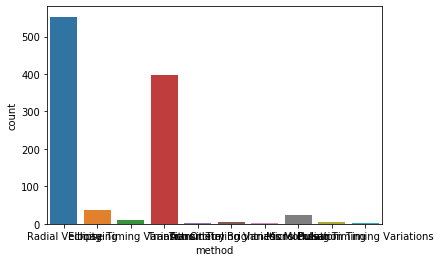

In [98]:
sns.countplot(data=planets,x="method")

In [78]:
ser.mean()

0.5623850983416314

In [79]:
df=pd.DataFrame({'A':rnd.rand(5),
                 'B':rnd.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [80]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [81]:
df.mean(axis=1)
# of df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [82]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [100]:
planets.dropna(inplace=True)

In [101]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 784
Data columns (total 6 columns):
method            498 non-null object
number            498 non-null int64
orbital_period    498 non-null float64
mass              498 non-null float64
distance          498 non-null float64
year              498 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 27.2+ KB


In [85]:
planets.describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [86]:
# Aggregation Description
# count() Total number of items
# first(), last() First and last item
# mean(), median() Mean and median
# min(), max() Minimum and maximum
# std(), var() Standard deviation and variance
# mad() Mean absolute deviation
# prod() Product of all items
# sum() Sum of all items


In [87]:
planets.groupby('method')

In [88]:
planets.groupby('method')['orbital_period']

In [89]:
planets.groupby('method')['orbital_period'].median()

method
Radial Velocity    358.00000
Transit              2.70339
Name: orbital_period, dtype: float64

In [99]:
for(method,group) in planets.groupby('method'):
    print("{0:30s}shape={1}".format(method,group.shape))

Astrometry                    shape=(2, 6)
Eclipse Timing Variations     shape=(9, 6)
Imaging                       shape=(38, 6)
Microlensing                  shape=(23, 6)
Orbital Brightness Modulation shape=(3, 6)
Pulsar Timing                 shape=(5, 6)
Pulsation Timing Variations   shape=(1, 6)
Radial Velocity               shape=(553, 6)
Transit                       shape=(397, 6)
Transit Timing Variations     shape=(4, 6)


In [103]:
planets.groupby('method').describe()

number                                               \
                 count      mean       std  min  25%  50%  75%  max   
method                                                                
Radial Velocity  497.0  1.736419  1.176441  1.0  1.0  1.0  2.0  6.0   
Transit            1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0   

                orbital_period              ... distance          year  \
                         count        mean  ...      75%    max  count   
method                                      ...                          
Radial Velocity          497.0  837.454878  ...    59.28  354.0  497.0   
Transit                    1.0    2.703390  ...   178.00  178.0    1.0   

                                                                                
                        mean       std     min     25%     50%     75%     max  
method                                                                          
Radial Velocity  2007.366197  4.163821  1989.0  2005.0  2009.0  2011.0  2014.0  
Transit          2013.000000       NaN  2013.0  2013.0  2013.0  2013.0  2013.0  

[2 rows x 40 columns]

In [102]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Radial Velocity,497.0,2007.366197,4.163821,1989.0,2005.0,2009.0,2011.0,2014.0
Transit,1.0,2013.000000,NaN,2013.0,2013.0,2013.0,2013.0,2013.0


In [125]:
decade=10*(planets['year']//10)
# decade=decade.astype(str)+'s'
# decade.name='decade'
planets.groupby(['method',decade])["number"].sum().unstack().fillna(0)

year,1980,1990,2000,2010
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
